# Housing Data Analysis

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
DATA = './datasets/housing/housing.csv'
housing = pd.read_csv(DATA)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.median_income.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [8]:
housing['income_group'] = (housing.median_income / 3).astype(int)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_group
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


## Stratified Split

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_group']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Visualizing

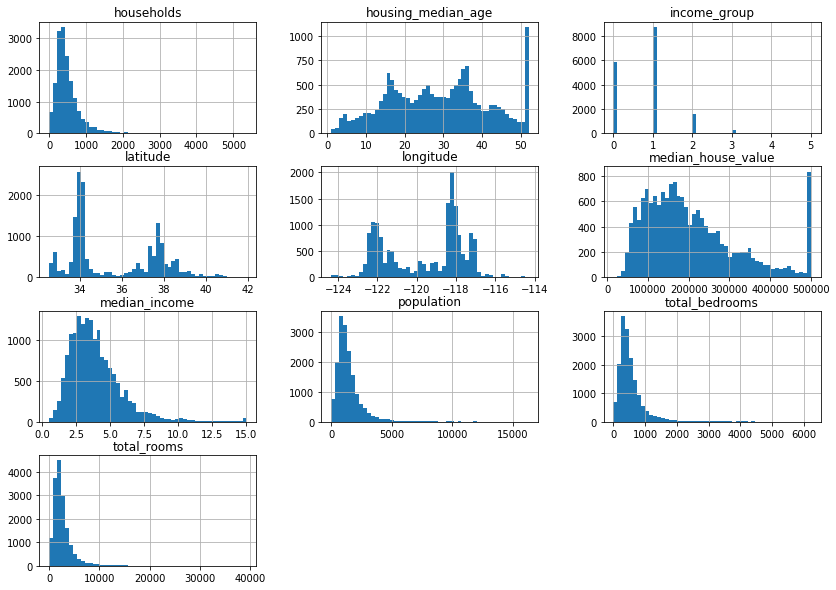

In [31]:
strat_train_set.hist(bins=50, figsize=(14, 10))
plt.show()

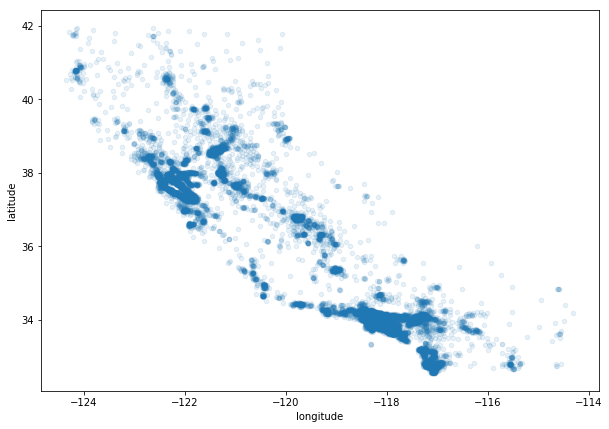

In [17]:
strat_train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(10, 7))
plt.show()

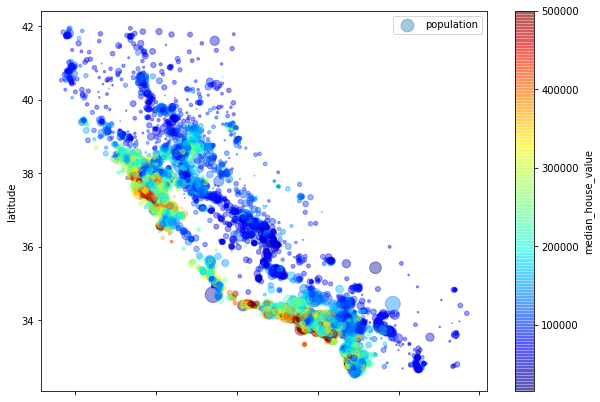

In [20]:
strat_train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=strat_train_set['population']/50, label='population', figsize=(10, 7), c='median_house_value',
                    cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [21]:
strat_train_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_group
longitude,1.000000,-0.924441,-0.115146,0.047245,0.071242,0.105684,0.058411,-0.018019,-0.051983,-0.009502
latitude,-0.924441,1.000000,0.017664,-0.038932,-0.068741,-0.113570,-0.073794,-0.079388,-0.140456,-0.081568
housing_median_age,-0.115146,0.017664,1.000000,-0.363693,-0.324215,-0.308711,-0.306540,-0.117710,0.109891,-0.105803
total_rooms,0.047245,-0.038932,-0.363693,1.000000,0.931274,0.869354,0.919969,0.201196,0.133416,0.185527
total_bedrooms,0.071242,-0.068741,-0.324215,0.931274,1.000000,0.886795,0.980642,-0.001628,0.050779,0.001054
population,0.105684,-0.113570,-0.308711,0.869354,0.886795,1.000000,0.914516,0.013154,-0.025033,0.008496
households,0.058411,-0.073794,-0.306540,0.919969,0.980642,0.914516,1.000000,0.018459,0.066632,0.019161
median_income,-0.018019,-0.079388,-0.117710,0.201196,-0.001628,0.013154,0.018459,1.000000,0.687315,0.916877
median_house_value,-0.051983,-0.140456,0.109891,0.133416,0.050779,-0.025033,0.066632,0.687315,1.000000,0.636331
income_group,-0.009502,-0.081568,-0.105803,0.185527,0.001054,0.008496,0.019161,0.916877,0.636331,1.000000


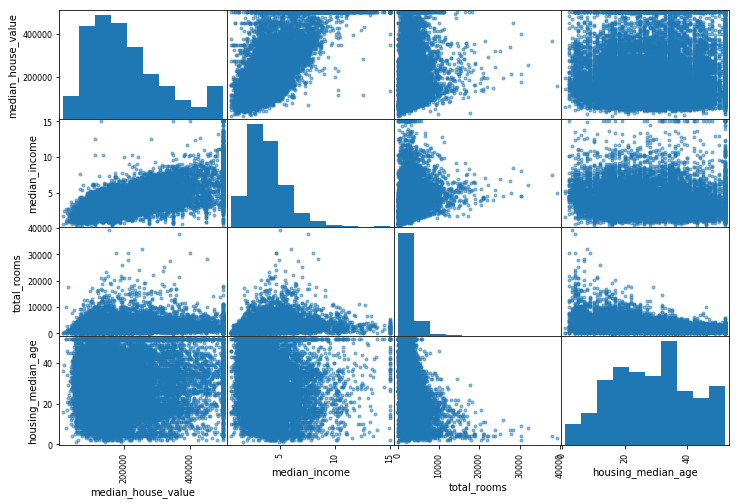

In [23]:
from pandas.tools.plotting import scatter_matrix

attributes = ['median_house_value',
             'median_income',
             'total_rooms',
             'housing_median_age']

scatter_matrix(strat_train_set[attributes], figsize=(12, 8))
plt.show()

In [24]:
housing_data = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [26]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing['ocean_proximity'])

housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [30]:
strat_train_set.hist??